<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/DSF03_P2_Multiple_Linear_Regression_part2_william.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Multiple Linear regression part2
## Objectives
*   a. use statmodel with constant
*   b. manual and sklearn scaling
*   c. checking different regression metrics
*   d. AOB



In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
%matplotlib inline


Connecting the data from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the wine dataset
# Specify the file path in your Google Drive
file_path = "/content/drive/MyDrive/DSF-P3 Materials/winequality-red.csv"
df= pd.read_csv(file_path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#statistical summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Preparing data for modeling

In [ ]:
#making a copy copy to be used for modeling
wine= df.copy(deep=True)

In [ ]:
#our target variable will be alcoholic content.
X = wine.drop("alcohol", axis=1) # predictors  # always avoid data leakage
y = wine["alcohol"]# target

In [ ]:
y.head()

0    9.4
1    9.8
2    9.8
3    9.8
4    9.4
Name: alcohol, dtype: float64

##### Using statmodel

In [ ]:
# statmodel
# use sm.add_constant(), to add constant term/y-intercept
X_pred = sm.add_constant(X)# we add constant to differentiate predictor from other features.

#building the model
model =  sm.OLS(y,X_pred) .fit()

#getting the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     323.0
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        16:23:25   Log-Likelihood:                -1430.5
No. Observations:                1599   AIC:                             2885.
Df Residuals:                    1587   BIC:                             2949.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  563.1753     13.345     42.201      0.000     537.000     589.351
fixed acidity            0.4925      0.020     24.215      0.000       0.453       0.532
volatile acidity         0.5893      0.113      5.223      0.000       0.368       0.811
citric acid              0.8197      0.133      6.143      0.000       0.558       1.081
residual sugar           0.2624      0.012     21.715      0.000       0.239       0.286
chlorides               -0.9330      0.386     -2.416      0.016      -1.690      -0.176
free sulfur dioxide     -0.0030      0.002     -1.515      0.130      -0.007       0.001
total sulfur dioxide    -0.0014      0.001     -2.071      0.039      -0.003   -7.33e-05
density               -573.6341     13.649    -42.027      0.000    -600.406    -546.862
pH                       3.6170      0.151     24.001      0.000       3.321       3.913
sulphates                0.9540      0.104      9.154      0.000       0.750       1.158
quality                  0.2322      0.022     10.429      0.000       0.189       0.276
==============================================================================
Omnibus:                       96.599   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.331
Skew:                           0.461   Prob(JB):                     3.41e-36
Kurtosis:                       4.266   Cond. No.                     7.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation, we add a constant "const", due to beta we have in an equation. this is beta 0.**

**The constant represents the y-intercept of the regression line, which is the value of the dependent variable (y) when all independent variables (x) are zero.**

**The inclusion of a constant term in a regression model allows the line to have an offset from the origin (0,0) and better capture the relationship between the variables. Without a constant term, the regression line would be forced to pass through the origin, which may not accurately represent the data.**

### Note:
the coefficient of density is higher since it's value was small and due to different scales, the value is multiplied by a bigger value to match the rest thus higher coefficient.

We can rectify the above issue by scaling our features. This will help avoid our features from being shrinked or expanded ## this makes the coefficient interpretion esier.



### solution: standard scaling
There're different ways of doing this;

we'll focus on standard scaling(scaling it to features respective z-scores)

benefits
1.   makes value relatively small(mean value is zero, and std deviation from the mean is 1.
2.   easier interpretation: larger coefficient tend to be influential




In [ ]:
#checking std deviation of the original predictors
#np.std(X)

Manual standard scaling

In [ ]:
# standand scaling(subtract the mean of the variable/the std deviation of the variable)
#standar scaling is the  z score: z = (x - μ) / σ, σ = σ = √[(Σ(xi - μ)²) / N]
#including all the columns
X_predict_scaled = (X-np.mean(X))/np.std(X)
X_predict_scaled.head()



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.787823


In [ ]:
#checking the statisticall summary
X_predict_scaled.describe()

In [ ]:
#modeling
X_pred = sm.add_constant(X_predict_scaled)
#building the model
model2 =  sm.OLS(y,X_pred).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     323.0
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        16:28:18   Log-Likelihood:                -1430.5
No. Observations:                1599   AIC:                             2885.
Df Residuals:                    1587   BIC:                             2949.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.4230      0.015    701.444      0.000      10.394      10.452
fixed acidity            0.8572      0.035     24.215      0.000       0.788       0.927
volatile acidity         0.1055      0.020      5.223      0.000       0.066       0.145
citric acid              0.1596      0.026      6.143      0.000       0.109       0.211
residual sugar           0.3698      0.017     21.715      0.000       0.336       0.403
chlorides               -0.0439      0.018     -2.416      0.016      -0.080      -0.008
free sulfur dioxide     -0.0316      0.021     -1.515      0.130      -0.072       0.009
total sulfur dioxide    -0.0457      0.022     -2.071      0.039      -0.089      -0.002
density                 -1.0823      0.026    -42.027      0.000      -1.133      -1.032
pH                       0.5582      0.023     24.001      0.000       0.513       0.604
sulphates                0.1617      0.018      9.154      0.000       0.127       0.196
quality                  0.1875      0.018     10.429      0.000       0.152       0.223
==============================================================================
Omnibus:                       96.599   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.331
Skew:                           0.461   Prob(JB):                     3.41e-36
Kurtosis:                       4.266   Cond. No.                         5.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Note:

1. After scaling when all values of x=0, it means unscalled variables equal to the mean of that variable.
2. B0 will be the only determinant in predicting the target.



### **Multiple linear Regression in scikit-learn**

after trying mlr with statmodel, we'll try it with sklearn.

In [ ]:
#data to be used
df2 = df.copy(deep=True)
#our target variable will be alcoholic content.
predX = df2.drop("alcohol", axis=1) # predictors
y = df2["alcohol"]# target

#### 1. scaling the data suing sklearn library

In [ ]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

#a creating stndardScaler object to scale the data for us
ss= StandardScaler()

In [ ]:
#b apply Standardscaler object to our data by using fit() and transform() method
ss.fit(predX)
predX_st_scaled = ss.transform(predX)

In [ ]:
#checking whether the manual and the sklearn scaling is the same
np.allclose(predX_st_scaled, X_predict_scaled)

True

In [ ]:
#checking predicted values
X_predict_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.787823


In [ ]:
X_predict_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.787823


In [ ]:
#checking the mean of the target variable
y.mean()

10.422983114446529

In [ ]:
#checking scaled vlue
predX_st_scaled[:5,:]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.78782264],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
         0.45084835],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.78782264]])

#### Fit the Model

In [ ]:
#fit the model to our training data
lr = LinearRegression()
lr.fit(predX_st_scaled, y)

LinearRegression()

In [ ]:
#checking the coef
#we can use coef_ attribute to regecover the result of regression.
#list of all of data coeficient
# we can check our statmodel coef to compare.
lr.coef_

array([ 0.85718719,  0.10549156,  0.15963774,  0.3698161 , -0.04389617,
       -0.03156542, -0.04572472, -1.0823005 ,  0.55824786,  0.16166462,
        0.18747571])

In [ ]:
#getting the intercept
lr.intercept_

10.42298311444649

In [ ]:
#we can get the r squared of our model by using score()
#lr.score(y,predX_st_scaled)

In [ ]:
df.alcohol

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [ ]:
#Getting the prodiction of our model
y_hat = lr.predict(predX_st_scaled)
y_hat[:10,]

array([ 9.59838665,  9.54328512,  9.55417748, 10.49863177,  9.59838665,
        9.53512903,  9.66396658, 11.13243505, 10.30343472, 10.46910308])

we can now evaluate our model to see how it perfomed

In [ ]:
#checking the predictor number again
predX_st_scaled.shape


(1599, 11)

In [ ]:
#create base predictor/ when my scaled values have average value of zeros in scaled term.
base_pred=np.zeros(11).reshape(1,-1)
base_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#getting the intercept value
lr.predict(base_pred)# the prediction will be the intercept if the average scaled value is equal to zero.

array([10.42298311])

### **Model Evaluation**

1. **observing residuals**.

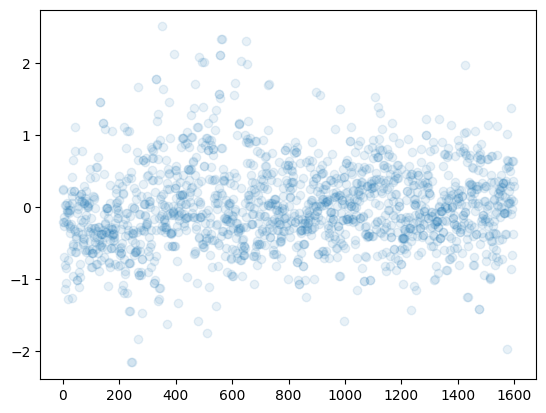

In [ ]:
#making predictions
y_hat = lr.predict(predX_st_scaled)
residual= (y-y_hat)

#plot residuals
plt.scatter(x=range(y_hat.shape[0]), y=residual, alpha=0.1);


Observation: the model meets ll the assumption of MLR:
1. Linearity
2. Independence
3. Normality
4. Hetroskedasticity/homoscedascity(Equal Variance)

### **Sklearn Metrics**

we have a couple of metrics in sklearn, these include
1. R^2 score
2. The mean Absolute error (MAE)
3. The mean standard error (MSE)
4. The Root mean standard error (RMSE)

note: by default the metric is R^2 score.


In [ ]:
#getting the r2 score### r2_score = y-y_pred
metrics.r2_score(y, lr.predict(predX_st_scaled))

0.6912531089251452

Things to note:

ensure the metric is properly clibrated. if we put simply y_bar as our prediction, then we could get r^2 score of 0. And if we predict , say y_bar +1, then we should get a negative R^2 score as demonstrated below.


In [ ]:
# checking with the mean of y
avg_alcohol = np.mean(y)
num = len(y)

#metrics.r2_score(y, avg_alcohol*np.ones(num))

In [ ]:
#checking with the mean of y plus 1
#metrics.r2_score(y, (avg_alcohol+1) *np.ones(num))

In [ ]:
#computing MAE
metrics.mean_absolute_error(y, lr.predict(predX_st_scaled))

0.4525669854371807

In [ ]:
#computing MSE
metrics.mean_squared_error(y, lr.predict(predX_st_scaled))

0.3504083232624884

In [ ]:
#Root scared error
#computing RMSE
metrics.mean_squared_error(y, lr.predict(predX_st_scaled), squared=False),#squared=False

(0.5919529738606677,)

**END**